In [5]:
# Import Dependencies
# Dependencies
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [6]:
per_capita_income="Per_Capita_Income 2008-2012.csv"
edu_data=pd.read_csv(per_capita_income)
edu_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [7]:
crime_2010="2010_data_csv.csv"
crime_data=pd.read_csv(crime_2010)
crime_data_renamed=crime_data.rename(columns={"Community Area": "Community Area Number"})
crime_data_renamed.head()


,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area Number,FBI Code,Year
0,1/1/10,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,931,9,15.0,61.0,17,2010
1,1/1/10,266,CRIM SEXUAL ASSAULT,PREDATORY,OTHER,True,False,2011,20,40.0,2.0,2,2010
2,1/1/10,265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,APARTMENT,False,True,2413,24,50.0,2.0,2,2010
3,1/1/10,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,931,9,15.0,61.0,17,2010
4,1/1/10,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,813,8,13.0,65.0,17,2010


In [8]:
crime_data_renamed["Primary Type"].value_counts()

THEFT                               76797
BATTERY                             65403
NARCOTICS                           43393
CRIMINAL DAMAGE                     40659
BURGLARY                            26426
OTHER OFFENSE                       22020
ASSAULT                             21536
MOTOR VEHICLE THEFT                 19029
ROBBERY                             14274
DECEPTIVE PRACTICE                  12546
CRIMINAL TRESPASS                    9401
WEAPONS VIOLATION                    3704
PUBLIC PEACE VIOLATION               3538
OFFENSE INVOLVING CHILDREN           2600
PROSTITUTION                         2485
CRIM SEXUAL ASSAULT                  1381
SEX OFFENSE                          1133
GAMBLING                              927
INTERFERENCE WITH PUBLIC OFFICER      797
LIQUOR LAW VIOLATION                  736
ARSON                                 522
HOMICIDE                              438
KIDNAPPING                            313
INTIMIDATION                      

In [9]:
# crime_data2=crime_data[["Primary Type", "Arrest","Community Area"]]
# crime_data2.head()


In [10]:
# combine datasets
merge_data = pd.merge(crime_data_renamed, edu_data, on="Community Area Number")
merge_data.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,Year,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1/1/10,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,APARTMENT,False,False,931,9,15.0,...,17,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
1,1/1/10,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,931,9,15.0,...,17,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,1/1/10,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,915,9,16.0,...,14,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
3,1/1/10,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,935,9,3.0,...,2,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
4,1/1/10,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,932,9,16.0,...,2,2010,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0


In [11]:
list(merge_data.columns.values)

['Date',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area Number',
 'FBI Code',
 'Year',
 'COMMUNITY AREA NAME',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

In [12]:
merge_data["COMMUNITY AREA NAME"].value_counts()

Austin             24308
South Shore        12328
Humboldt park      11837
Near North Side    11601
West Town          11364
                   ...  
Hegewisch            767
Forest Glen          695
Burnside             460
Edison Park          305
CHICAGO              186
Name: COMMUNITY AREA NAME, Length: 78, dtype: int64

In [13]:
#homicides_df = merge_data.loc[(merge_data["Primary Type"] == "HOMICIDE" )| (merge_data["Primary Type"] == "Theft"), :]
#homicides_df
#only_billy_and_peter = df.loc[(df["first_name"] == "Billy") | (
 #   df["first_name"] == "Peter"), :]
merge_filter_by_commun=merge_data.loc[(merge_data["COMMUNITY AREA NAME"]=="Loop") | 
                       (merge_data["COMMUNITY AREA NAME"]=="Rogers Park") | 
                       (merge_data["COMMUNITY AREA NAME"]=="South Chicago")| 
                       (merge_data["COMMUNITY AREA NAME"]=="Morgan Park")|
                       (merge_data["COMMUNITY AREA NAME"]=="Logan Square")|
                       (merge_data["COMMUNITY AREA NAME"]=="Portage Park")|
                       (merge_data["COMMUNITY AREA NAME"]=="Hyde Park")|
                       (merge_data["COMMUNITY AREA NAME"]=="Englewood")|
                       (merge_data["COMMUNITY AREA NAME"]=="Humboldt park")]
                   #    (merge_data["Primary Type"]=="HOMICIDE")]
merge_filter_by_commun.head()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,FBI Code,Year,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
21343,1/1/10,266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,False,True,2424,24,49.0,...,2,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21344,1/1/10,820,THEFT,$500 AND UNDER,STREET,False,False,2424,24,49.0,...,6,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21345,1/1/10,890,THEFT,FROM BUILDING,OTHER,False,False,2431,24,49.0,...,6,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21346,1/1/10,841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2432,24,40.0,...,6,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
21347,1/1/10,501A,OTHER OFFENSE,ANIMAL ABUSE/NEGLECT,APARTMENT,False,False,2432,24,40.0,...,26,2010,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0


In [14]:
# Filter on homicides and drop unneccesary rows and columns
homicides_df = merge_filter_by_commun.loc[(merge_filter_by_commun["Primary Type"] == "HOMICIDE")]
homicides_df = homicides_df[["Year","Primary Type", "COMMUNITY AREA NAME","PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA"]]
homicides_df.head()  

#homicides_df[['COMMUNITY AREA NAME','Primary Type']]


,Year,Primary Type,COMMUNITY AREA NAME,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
21520,2010,HOMICIDE,Rogers Park,18.2
23481,2010,HOMICIDE,Rogers Park,18.2
24975,2010,HOMICIDE,Rogers Park,18.2
37488,2010,HOMICIDE,Humboldt park,35.4
38003,2010,HOMICIDE,Humboldt park,35.4


In [15]:
df = pd.DataFrame(homicides_df['COMMUNITY AREA NAME'].value_counts())

In [16]:
df = df.reset_index()

In [17]:
df.columns = ['neighborhood','count']

In [18]:
homicides_df.columns = ['Year', 'Primary Type', 'neighborhood',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']

In [19]:
df = homicides_df.merge(df,how="inner",on='neighborhood')

In [20]:
df = df.groupby('neighborhood')[['count','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']].max()

In [22]:
df

,count,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
neighborhood,,
Englewood,11,28.5
Humboldt park,27,35.4
Hyde Park,1,4.3
Logan Square,2,14.8
Loop,1,3.1
Morgan Park,9,10.8
Portage Park,2,19.3
Rogers Park,3,18.2
South Chicago,15,26.6


In [58]:
#df['count'].plot()
#df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar')
#plt.show()

Text(0, 0.5, 'Number of Homicide')

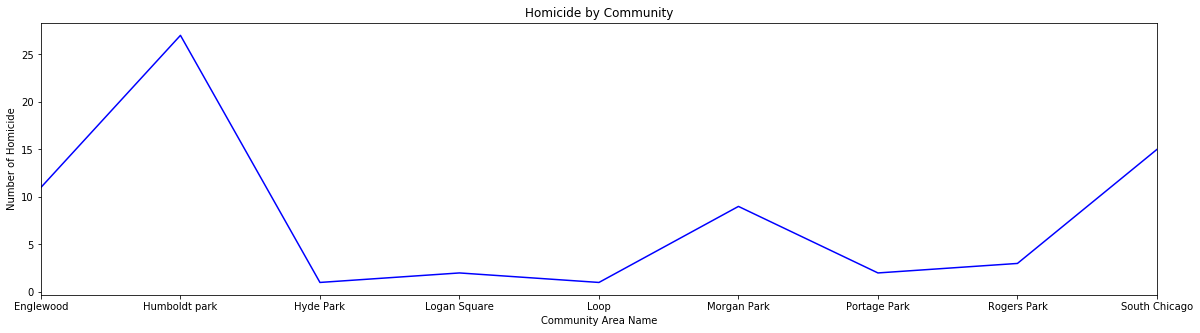

In [77]:
plt.figure(figsize=(20,5))
df['count'].plot(color='b')
plt.title("Homicide by Community")
plt.xlabel('Community Area Name')
plt.ylabel('Number of Homicide')

Text(0, 0.5, '% AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')

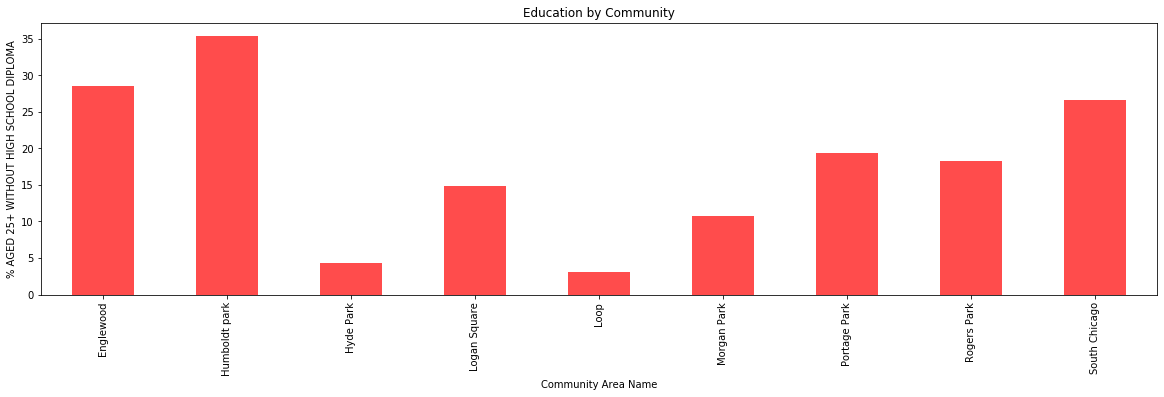

In [82]:
plt.figure(figsize=(20,5))
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar', color='r', alpha=0.7, align="center")

plt.title("Education by Community")
plt.xlabel('Community Area Name')
plt.ylabel('% AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')

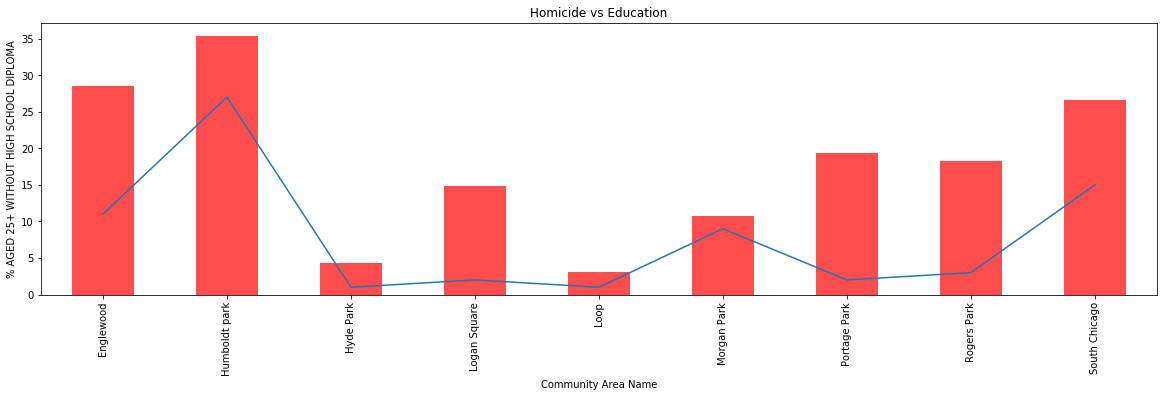

In [83]:
plt.figure(figsize=(20,5))
df['count'].plot()
df['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'].plot(kind='bar',color='r', alpha=0.7, align="center")
plt.title("Homicide vs Education")
plt.xlabel('Community Area Name')
plt.ylabel('% AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA')
plt.show()